(array([218, 222, 226], dtype=int64),)
(array([], dtype=int64),)


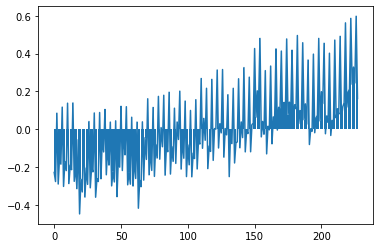

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import netCDF4 as nc
import xarray as xr

data = nc.Dataset('././NOAA_NCDC_ERSST_v3b_SST.nc')
sst = data['sst']
lon = xr.DataArray(data['lon'][:])
lat = xr.DataArray(data['lat'][:])
time = data['time']

# Nino3.4(西经170度-西经120度、北纬5度-南纬5度)

nino_lat = np.where((lat > -5) & (lat < 5))
nino_lon = np.where((lon > 190) & (lon < 240))
nino_lat = np.array(nino_lat).tolist()[0]
nino_lon = np.array(nino_lon).tolist()[0]
sst_nino = sst[:, nino_lat, nino_lon]
sst_month = np.empty(len(time))
for i in range(len(time)):
    sst_month[i] = np.mean(sst[i, :, :])


sst_3m = []
mean_total = np.mean(sst_month)
for i in range(0, len(sst_month), 3):
    month_3 = np.mean(sst_month[i:i+2])
    sst_3m.append(month_3)

x = list(range(len(sst_3m)))
sst_standard = (sst_3m-mean_total)
print(np.where(sst_standard > 0.5))
print(np.where(sst_standard < -0.5))
plt.bar(x, sst_standard)
plt.plot(x, sst_standard)
plt.show()
